# ПРОЕКТ ПО SQL: АНАЛИЗ БАЗЫ ДАННЫХ СЕРВИСА ДЛЯ ЧТЕНИЯ КНИГ ПО ПОДПИСКЕ

**СОДЕРЖАНИЕ ПРОЕКТА**
1. [ОПИСАНИЕ ПРОЕКТА (техническое задание, описание данных, цель исследования](#describ)

2. [ШАГ 1.ПОДКЛЮЧЕНИЕ К БАЗЕ](#part_1)

3. [ШАГ 2.ЗАГРУЗКА ДАННЫХ](#part_2)
         
4. [ШАГ 3. ЗАДАНИЯ](#part_3) 
   
5. [ШАГ 4. ВЫВОДЫ](#part_4)

## ОПИСАНИЕ ПРОЕКТА 
<a id="describ"></a> 

*Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.*

**Цель исследования:**  проанализировать базу данных сервиса для чтения книг по подписке с целью формулирования ценностного предложения для нового продукта.

**Описание данных**

**Таблица `books` (содержит данные о книгах)**

* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

**Таблица `authors` (содержит данные об авторах)**

* `author_id` — идентификатор автора;
* `author` — имя автора.

**Таблица `publishers` (содержит данные об издательствах)**

* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства;

**Таблица `ratings` (содержит данные о пользовательских оценках книг)**

* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

**Таблица `reviews` (содержит данные о пользовательских обзорах)**

* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя автора обзора;
* `text` — текст обзора.

**Задания**
* Посчитайте, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитайте количество обзоров и среднюю оценку;
* Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
* Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
* Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

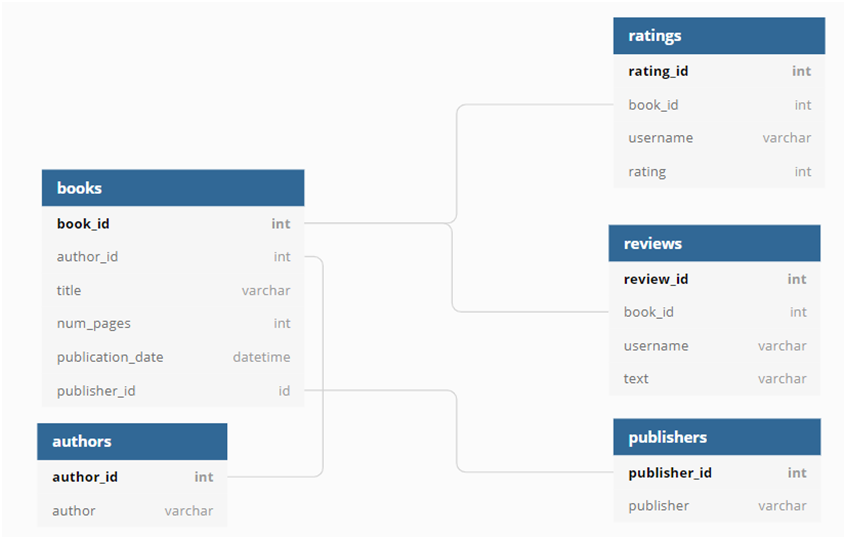

## ШАГ 1: ПОДКЛЮЧЕНИЕ К БАЗЕ
<a id="part_1"></a> 

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## ШАГ 2: ЗАГРУЗКА ДАННЫХ
<a id="part_2"></a> 

### Таблица books (содержит данные о книгах)

In [3]:
query = '''

SELECT * 
FROM books
LIMIT 5

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### Таблица authors (содержит данные об авторах)

In [4]:
query = '''

SELECT * 
FROM authors
LIMIT 5

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


### Таблица publishers (содержит данные об издательствах)

In [5]:
query = '''

SELECT * 
FROM publishers
LIMIT 5

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


### Таблица ratings (содержит данные о пользовательских оценках книг)

In [6]:
query = '''

SELECT * 
FROM ratings
LIMIT 5

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


### Таблица reviews (содержит данные о пользовательских обзорах)

In [7]:
query = '''

SELECT * 
FROM reviews
LIMIT 5

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## ШАГ 3: ЗАДАНИЯ
<a id="part_3"></a> 

### Посчитайте, сколько книг вышло после 1 января 2000 года;

In [8]:
query = '''

SELECT COUNT(book_id) 
FROM books
WHERE publication_date > '2000-01-01'

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,count
0,819


**После 1 января 2000 года вышло 819 книг**

### Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [9]:
query = '''

SELECT b.book_id, 
       b.title,
       COUNT(DISTINCT(rs.review_id)),
       AVG(rt.rating)
FROM books AS b
LEFT JOIN reviews AS rs ON b.book_id = rs.book_id
LEFT JOIN ratings AS rt ON b.book_id = rt.book_id
GROUP BY b.book_id
ORDER BY 3 DESC

'''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,book_id,title,count,avg
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [10]:
query = '''

SELECT a.publisher 
FROM (SELECT b.publisher_id, COUNT(b.book_id), p.publisher
FROM books as b
LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id 
WHERE b.num_pages>50
GROUP BY b.publisher_id, p.publisher
ORDER BY 2 DESC) as a
LIMIT 1

'''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,publisher
0,Penguin Books


**Наибольшее количество книг толще 50 страниц выпустило издательство Penguin Books**

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

**Автор с самой высокой средней оценкой книг с 50 и более оценками - J.K. Rowling/Mary GrandPré**

In [13]:
query = '''

SELECT r.author 
FROM (WITH i AS
(SELECT book_id, COUNT(rating) as count, AVG(rating) as avg FROM ratings
GROUP BY book_id
HAVING COUNT(rating)>49
ORDER BY 3 DESC)
SELECT DISTINCT(a.author), AVG(i.avg) OVER (PARTITION BY a.author)
FROM i LEFT JOIN books AS b ON i.book_id=b.book_id
LEFT JOIN authors AS a ON b.author_id = a.author_id
ORDER BY 2 DESC) AS r
LIMIT 1

'''

con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,author
0,J.K. Rowling/Mary GrandPré


### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [12]:
query = '''

WITH i AS
(SELECT DISTINCT(rt.username), COUNT(rt.rating) AS count
FROM ratings AS rt 
GROUP BY rt.username
HAVING COUNT(rt.rating)>48
ORDER BY 2 DESC),
j AS
(SELECT DISTINCT(rs.username), COUNT(rs.review_id) OVER (PARTITION BY rs.username) AS count
FROM reviews AS rs)
SELECT AVG(j.count)
FROM i 
LEFT JOIN j ON i.username = j.username

'''
con=engine.connect()
pd.io.sql.read_sql(sql=text(query), con = con)

,avg
0,24.0


**Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок равно 24**

## ВЫВОД
<a id="part_4"></a> 

* После 1 января 2000 года вышло 819 книг;
* Для каждой книги рассчитано количество обзоров и среднюя оценка;
* Наибольшее количество книг толще 50 страниц выпустило издательство Penguin Books;
* Автор с самой высокой средней оценкой книг с 50 и более оценками - J.K. Rowling/Mary GrandPré;
* Cреднее количество обзоров от пользователей, которые поставили больше 48 оценок равно 24;